# Machine Learning Insurance Classification Final Project


##### **Authors:** Weronika Mądro, Zahra Eshtiaghi

## Goal

The objective of this project is to build a machine learning classification model to predict the claim for insurance data. The following steps has been done: 

1. **Data Loading and Cleaning:** Imported the insurance dataset and performed initial cleaning to handle eventual missing values, correct data types, and ensure data quality.
2. **Exploratory Data Analysis (EDA):** Investigated distributions and relationships using visualizations and applied statistical tests to uncover significant patterns and correlations.
3. **Feature Engineering:** Created new variables and applied advanced encoding techniques to transform categorical features into meaningful numerical representations.
4. **Model Building and Evaluation:** Developed three models (Logistic Regression, KNN, SVM) to classify claims and evaluated its performance using appropriate metrics.
5. **Cross-Validation:** Applied cross-validation technique to assess the model’s stability and ensure it generalizes well to unseen data.
6. **Predictions:** Used the best model to generate predictions for all observations in the test dataset, enabling performance assessment on unseen data.



## Loading the libraries and the input data

The initial phase involves importing the required libraries that support data processing, exploratory analysis and model development.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from platform import processor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



We load the insurance_train and insurance_test csv files and store them in DataFrame objects named train and test.

In [2]:
train = pd.read_csv("insurance_train.csv")
test = pd.read_csv("insurance_test.csv")

## Dataset investigation

In this step, we begin by printing the number of observations and columns. This provides a quick overview of the dataset’s size, helping us understand how many data rows and features we are working with. We use train.head(5) to display the first five rows of the dataset.

In [3]:
print(f"Number of observations: {len(train)}")
print(f"Number of columns: {len(train.columns)}")
train.head(5)

Number of observations: 56993
Number of columns: 14


,reward,claim_status,person_gender,entity_type,channel,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length
0,0.000000,0,9b2d5b46,type_a,web,0,agt_0004,0.284509,50b3e71e,51,united states,105.459587,SecurePlan Flex,21
1,18.428627,0,9b2d5b46,type_a,web,0,agt_0001,0.207538,96d6c6df,32,spain,30.433459,DriveSafe Rental Addon,6
2,0.000000,0,9b2d5b46,type_a,web,1,agt_0004,0.300461,50b3e71e,38,new zealand,78.728474,TripGuard Cancel,84
3,0.000000,0,9b2d5b46,type_a,web,0,agt_0004,0.132404,50b3e71e,30,thailand,17.146843,TripGuard Cancel,39
4,0.000000,0,9b2d5b46,type_a,web,2,agt_0004,0.070443,50b3e71e,37,viet nam,10.476416,TripGuard Cancel,48


This output indicates that the training dataset contains 56 993 observations (rows) and 14 columns (features).

Later on we want to provide a concise summary of the training dataset.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56993 entries, 0 to 56992
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reward                56993 non-null  float64
 1   claim_status          56993 non-null  int64  
 2   person_gender         56993 non-null  object 
 3   entity_type           56993 non-null  object 
 4   channel               56993 non-null  object 
 5   support_interactions  56993 non-null  int64  
 6   agent_id              56993 non-null  object 
 7   customer_score        56993 non-null  float64
 8   entity_a              56993 non-null  object 
 9   person_age            56993 non-null  int64  
 10  location              56993 non-null  object 
 11  revenue               56993 non-null  float64
 12  product_id            56993 non-null  object 
 13  trip_length           56993 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 6.1+ MB


The data types include:

* 3 columns with float64 values, typically representing continuous numerical data.
* 4 columns with int64 values, representing discrete numerical data such as counts or categorical codes.
* 7 columns with object dtype, which usually indicates categorical or text-based variables.

Let’s take a closer look at what each column in the dataset represents:
* reward - the monetary payout amount for each claim
* claim_status - binary target indicating whether a claim was made (1) or not (0)
* person_gender - the insured individual’s gender category 
* entity_type - classification of the policyholder
* channel - the sales or service channel through which the policy was sold or the claim was filed 
* support_interactions - number of customer-support touchpoints associated with the policy
* agent_id - unique identifier for the insurance agent managing this policy
* customer_score - a precomputed score reflecting the customer’s risk profile or satisfaction level
* entity_a - secondary entity code 
* person_age - age of the insured individual, in years
* location - geographic region or country associated with the policy
* revenue - total premium revenue paid for the policy
* product_id - identifier for the specific insurance product purchased
* trip_length - duration of coverage in days

Now, we want to the same investigation for the test set.

In [5]:
print(f"Number of observations: {len(test)}")
print(f"Number of columns: {len(test.columns)}")
test.head(5)

Number of observations: 6333
Number of columns: 13


,reward,person_gender,entity_type,channel,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length
0,84.316320,9b2d5b46,type_a,web,2,agt_0001,0.009257,96d6c6df,31,ireland,-141.716239,DriveSafe Rental Addon,73
1,45.884363,9b2d5b46,type_a,web,0,agt_0001,0.108049,96d6c6df,29,australia,82.225268,DriveSafe Rental Addon,25
2,0.000000,9b2d5b46,type_a,web,2,agt_0004,0.108814,50b3e71e,26,indonesia,10.247118,TripGuard Cancel,6
3,29.363482,f67ab10a,type_b,web,1,agt_0002,0.215505,7b5dbb09,32,france,83.483247,TravelShield Value,73
4,12.440951,08f27188,type_b,web,0,agt_0005,0.194798,99ede4e4,26,singapore,46.679372,TravelShield Plus,32


This output indicates that the test dataset contains 6333 observations and 13 columns. Each row represents a single insurance claim entry for which predictions will be made. Compared to the training dataset (which had 14 columns), the test set is missing one column - the target variable (claim_status), since it's used for evaluating model predictions, not for training. 

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6333 entries, 0 to 6332
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reward                6333 non-null   float64
 1   person_gender         6333 non-null   object 
 2   entity_type           6333 non-null   object 
 3   channel               6333 non-null   object 
 4   support_interactions  6333 non-null   int64  
 5   agent_id              6333 non-null   object 
 6   customer_score        6333 non-null   float64
 7   entity_a              6333 non-null   object 
 8   person_age            6333 non-null   int64  
 9   location              6333 non-null   object 
 10  revenue               6333 non-null   float64
 11  product_id            6333 non-null   object 
 12  trip_length           6333 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 643.3+ KB


### *Missing values*

The next step is to check for missing values in the datasets. We also got this information using .info() function and now would like to emphasize only the missing values.

In [7]:
train.isna().sum()

reward                  0
claim_status            0
person_gender           0
entity_type             0
channel                 0
support_interactions    0
agent_id                0
customer_score          0
entity_a                0
person_age              0
location                0
revenue                 0
product_id              0
trip_length             0
dtype: int64

In [8]:
test.isna().sum()

reward                  0
person_gender           0
entity_type             0
channel                 0
support_interactions    0
agent_id                0
customer_score          0
entity_a                0
person_age              0
location                0
revenue                 0
product_id              0
trip_length             0
dtype: int64

As it is visible, the features have zero missing values, the datasets are complete, so we can move further. We do not have to deal with imputing any values.

### *Data balance check*

The next important step is to check the class balance in the target variable, in this case - claim_status.

In [9]:
# Count of each class and percentage
counts = train['claim_status'].value_counts()
print(counts)
props = train['claim_status'].value_counts(normalize=True) * 100
print(props.round(2))


claim_status
0    56159
1      834
Name: count, dtype: int64
claim_status
0    98.54
1     1.46
Name: proportion, dtype: float64


Definitely, the dataset is strongly imbalanced.  If we would train a model on this data without addressing the imbalance, it could achieve high accuracy simply by always predicting "0s", while completely failing to detect "1s".

We can also make a visualization dor the better view of the disproportion.

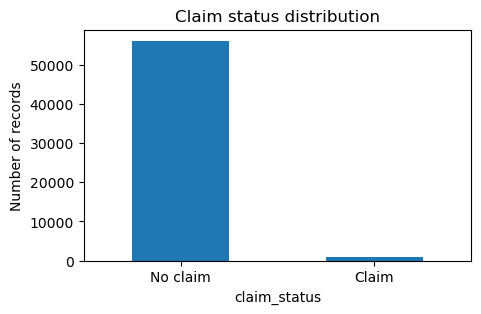

In [10]:
plt.figure(figsize=(5,3))
counts.plot.bar()
plt.xticks([0,1], ['No claim','Claim'], rotation=0)
plt.ylabel('Number of records')
plt.title('Claim status distribution')
plt.show()

The bar chart is a reasonable proof for our imbalanced data.

## Explanatory Data Analysis

#### *Target Variable Analysis*

Having completed the initial exploration of the dataset, we will now focus specifically on analyzing the target variable, claim_status, to better understand its distribution and implications for the classification task.



*****Measures of central tendency: mean, mode, median, quartiles*****

In [11]:
train['claim_status'].mean()

0.014633376028635096

In [12]:
train['claim_status'].median()

0.0

In [13]:
train['claim_status'].mode()

0    0
Name: claim_status, dtype: int64

In [14]:
[{i: train['claim_status'].quantile(i)} for i in np.arange(0, 1.1, 0.1)]

[{0.0: 0.0},
 {0.1: 0.0},
 {0.2: 0.0},
 {0.30000000000000004: 0.0},
 {0.4: 0.0},
 {0.5: 0.0},
 {0.6000000000000001: 0.0},
 {0.7000000000000001: 0.0},
 {0.8: 0.0},
 {0.9: 0.0},
 {1.0: 1.0}]

*****Measures of dispersion: standard deviation, IQR*****

In [15]:
train['claim_status'].var()

0.014419493339296317

In [16]:
train['claim_status'].std()

0.1200811947779348

In [17]:
train['claim_status'].quantile(0.75) - train['claim_status'].quantile(0.25)

0.0

*****Measures of shape: Skewness, Kurtosis*****

In [18]:
train['claim_status'].skew()

8.084257621963008

In [19]:
train['claim_status'].kurtosis()

63.357444638311776

*****Claim status distributions*****

We can also investigate our target variable with respect to the other variables, e.g. by creating the age distribution plot.

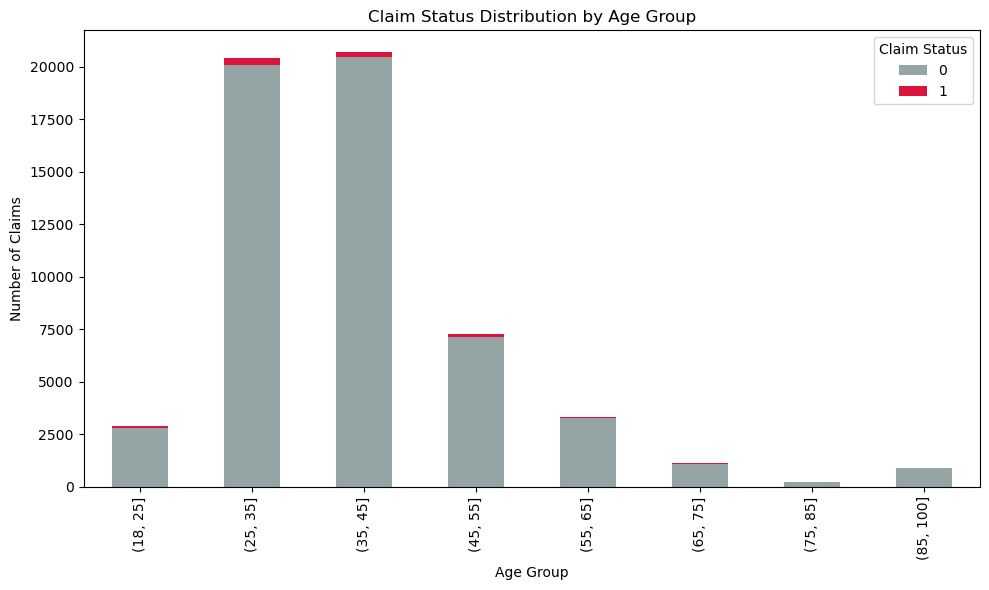

In [20]:
def plot_claim_distribution_by_age_group(data, age_col='person_age', target_col='claim_status', bins=None):

    if bins is None:
        bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
    
    data['age_group'] = pd.cut(data[age_col], bins)
    age_group_dist = data.groupby(['age_group', target_col], observed=True).size().unstack()
    age_group_dist.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#95a5a6', '#dc143c'])
    plt.title('Claim Status Distribution by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Claims')
    plt.legend(title='Claim Status', labels=['0', '1'])
    plt.tight_layout()
    plt.show()

plot_claim_distribution_by_age_group(train)


* Across all age groups, '0' claims (gray) far outweigh '1' claims (red). 
* The (25, 35] and (35, 45] age groups have the highest total number of claims, each exceeding 20,000 claims. These age ranges likely represent the core customer base for this insurance product.
* Age groups like (75, 85] and (85, 100] show very few claims, possibly because fewer individuals in those ranges are active policyholders.
* Although hard to quantify visually, there is a slightly larger red bar proportionally in the (25, 35] and (35, 45] groups compared to younger and older brackets. 

In addition to analyzing claim status by gender, we can also investigate the overall gender share in the dataset. This helps us understand the distribution of policyholders by gender and whether certain groups are more represented than others.

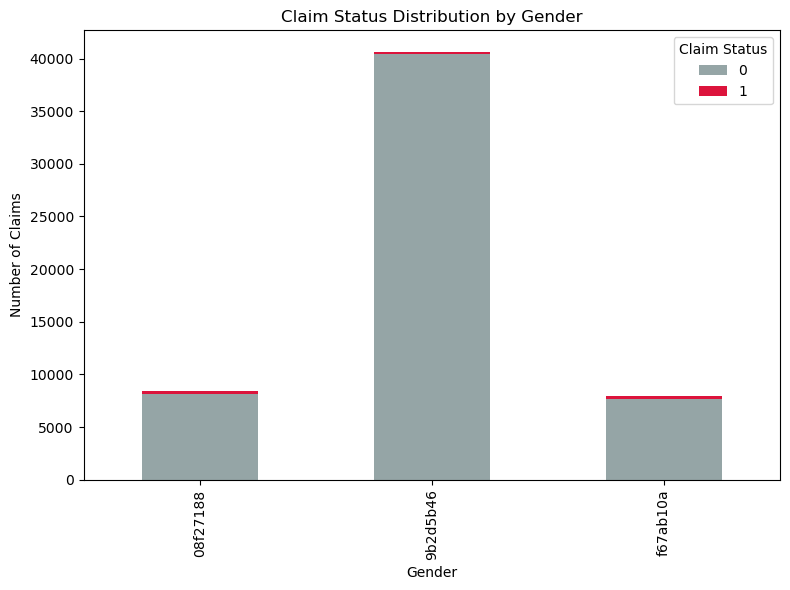

In [21]:
def plot_claim_status_by_gender(data, gender_col='person_gender', target_col='claim_status'):

    gender_dist = data.groupby([gender_col, target_col], observed=True).size().unstack().fillna(0)
    gender_dist.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#95a5a6', '#dc143c'])
    plt.title('Claim Status Distribution by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Number of Claims')
    plt.legend(title='Claim Status', labels=['0', '1'])
    plt.tight_layout()
    plt.show()

plot_claim_status_by_gender(train)

While the person_gender variable appears to be encoded, preventing us from directly assigning these categories to specific genders (e.g., male, female, don't want to say/other), we can still observe clear differences in their representation. One encoded gender category significantly dominates the dataset, accounting for the majority of claims. The remaining two categories are much smaller in comparison, yet all three show some level of fraudulent activity.

In next step, we would like to check how the numbers differ among different locations. We will create a bar chart graph showing top 10 countries accoding to number of claims. 

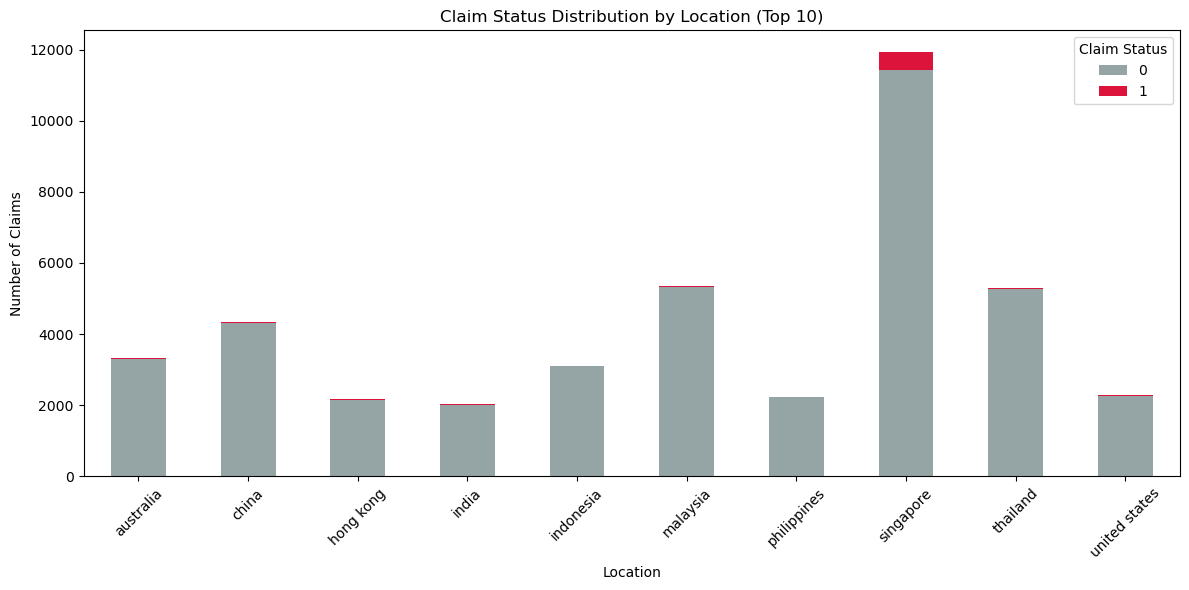

In [22]:
def plot_claim_status_by_location(data, location_col='location', target_col='claim_status', top_n=10):

    top_locations = data[location_col].value_counts().nlargest(top_n).index
    filtered_data = data[data[location_col].isin(top_locations)]
    loc_dist = filtered_data.groupby([location_col, target_col], observed=True).size().unstack().fillna(0)

    loc_dist.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#95a5a6', '#dc143c'])
    plt.title(f'Claim Status Distribution by Location (Top {top_n})')
    plt.xlabel('Location')
    plt.ylabel('Number of Claims')
    plt.xticks(rotation=45)
    plt.legend(title='Claim Status', labels=['0', '1'])
    plt.tight_layout()
    plt.show()

plot_claim_status_by_location(train)


This bar chart gives us a valuable insight. This plot shows that claim activity varies significantly by location, with Singapore being the most active. Fraudulent claims are visible across all countries, but their absolute counts follow the same pattern as total claims, more fraud where there are more claims. However, this doesn't necessarily mean those regions are riskier. Rate-based analysis is needed to assess fraud risk more accurately.

In [23]:
claim_counts_by_location = train.groupby(['location', 'claim_status']).size().unstack(fill_value=0)
claim_counts_by_location.columns = ['No Claim', 'Claim']
claim_counts_by_location['Total'] = claim_counts_by_location['No Claim'] + claim_counts_by_location['Claim']
claim_counts_by_location['Claim Share'] = (claim_counts_by_location['Claim'] / claim_counts_by_location['Total']).round(4) 

claim_counts_by_location_sorted = claim_counts_by_location.sort_values(by=['Claim','No Claim'], ascending=False)
print(claim_counts_by_location_sorted)

                          No Claim  Claim  Total  Claim Share
location                                                     
singapore                    11436    506  11942       0.0424
china                         4301     44   4345       0.0101
australia                     3289     34   3323       0.0102
thailand                      5271     32   5303       0.0060
united states                 2267     32   2299       0.0139
...                            ...    ...    ...          ...
tajikistan                       1      0      1       0.0000
tibet                            1      0      1       0.0000
turks and caicos islands         1      0      1       0.0000
uruguay                          1      0      1       0.0000
virgin islands, u.s.             1      0      1       0.0000

[146 rows x 4 columns]


Singapore has the highest volume of claims and also the highest absolute number of claims (506), with a claim share of 4.24%.

Another interesting variable to investigate is the dependency of claim status with respect to the reward value. Are large rewards more attractive for the claims? For the purpose of checking it we will introduce the boxplot and conduct a T-test.

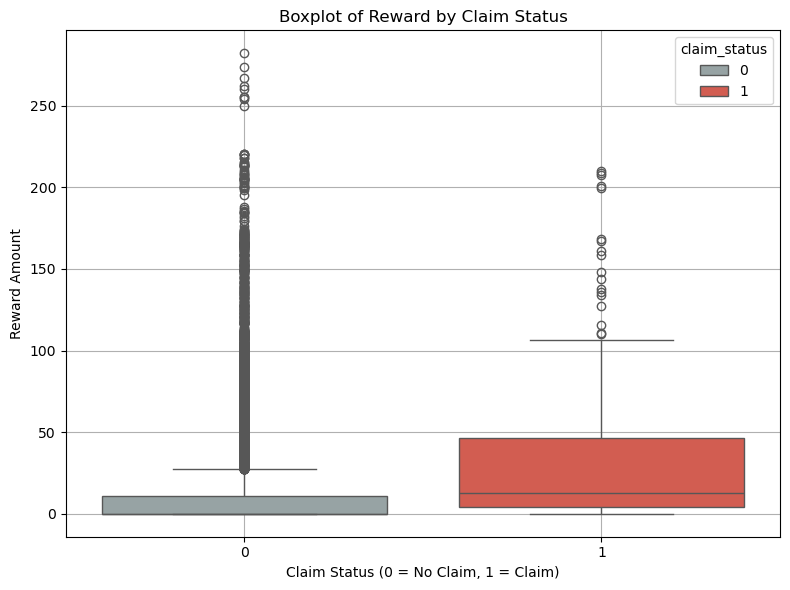

In [183]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x='claim_status', y='reward', hue='claim_status', palette=['#95a5a6', '#e74c3c'])
plt.title('Boxplot of Reward by Claim Status')
plt.xlabel('Claim Status (0 = No Claim, 1 = Claim)')
plt.ylabel('Reward Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

**No-claims:** Median reward is very low, close to 0. There are many outliers, with rewards exceeding 200. The distribution is highly skewed, indicating that while most no-claims receive small rewards, some receive very large ones.

**Claims:** The median reward is noticeably higher than for non-fraud claims, outliers are also present but less extreme than in the second group.

In [24]:
# T-test
rewards_non_fraud = train[train['claim_status'] == 0]['reward']
rewards_fraud = train[train['claim_status'] == 1]['reward']

t_stat, p_val = ttest_ind(rewards_non_fraud, rewards_fraud, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("→ Significant difference in reward between 'claims' and 'no-claims'.")
else:
    print("→ No significant difference in reward between groups.")


T-statistic: -14.6130
P-value: 0.0000
→ Significant difference in reward between 'claims' and 'no-claims'.


The average reward differs significantly between 'claims' and 'no-claims', suggesting reward size might be a useful predictor.

We can ask another question, does the agent matter? We can check out the number of claims and no-claims for different agents.

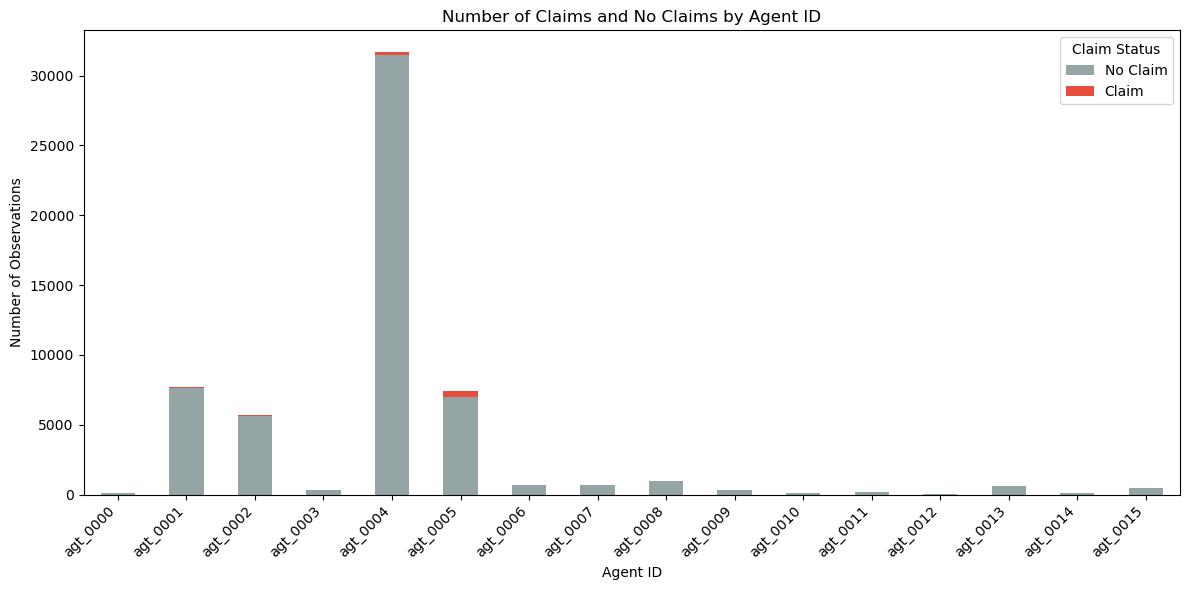

In [25]:
agent_claims = train.groupby(['agent_id', 'claim_status']).size().unstack(fill_value=0)
agent_claims.columns = ['No Claim', 'Claim']

agent_claims.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#95a5a6', '#e74c3c'])
plt.title('Number of Claims and No Claims by Agent ID')
plt.xlabel('Agent ID')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Claim Status')
plt.tight_layout()
plt.show()

As for locations, we can check the exact numbers and share.

In [26]:
agent_claims = train.groupby(['agent_id', 'claim_status']).size().unstack(fill_value=0)
agent_claims.columns = ['No Claim', 'Claim']
agent_claims['Total'] = agent_claims['No Claim'] + agent_claims['Claim']
agent_claims['Claim Share'] = agent_claims['Claim'] / agent_claims['Total']
agent_claims = agent_claims.sort_values(by='Claim Share', ascending=False)
print(agent_claims)

          No Claim  Claim  Total  Claim Share
agent_id                                     
agt_0005      6950    494   7444     0.066362
agt_0013       582     30    612     0.049020
agt_0014        81      4     85     0.047059
agt_0003       348      8    356     0.022472
agt_0011       172      3    175     0.017143
agt_0010        76      1     77     0.012987
agt_0000        88      1     89     0.011236
agt_0001      7636     77   7713     0.009983
agt_0008       943      6    949     0.006322
agt_0006       668      4    672     0.005952
agt_0004     31490    173  31663     0.005464
agt_0002      5653     30   5683     0.005279
agt_0009       296      1    297     0.003367
agt_0015       455      1    456     0.002193
agt_0007       650      1    651     0.001536
agt_0012        71      0     71     0.000000


Agent no. 5 turned to be in charge of the highest claim share.

#### *Other Variable Analysis*

As a next step, we check the statistical summary of the numerical features. This allows us to get a quick overview of each numeric column by examining key statistics such as the mean, standard deviation, minimum and maximum values, as well as the 25th, 50th (median), and 75th percentiles. 

In [27]:
train.describe()

,reward,claim_status,support_interactions,customer_score,person_age,revenue,trip_length
count,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000
mean,9.794976,0.014633,1.093941,0.189540,39.697261,40.750070,49.234888
std,19.791119,0.120081,0.923113,0.080641,12.603433,48.749221,98.659469
min,0.000000,0.000000,0.000000,0.000000,18.000000,-406.642669,1.000000
25%,0.000000,0.000000,0.000000,0.136389,34.000000,18.246389,9.000000
50%,0.000000,0.000000,1.000000,0.181041,36.000000,26.785242,22.000000
75%,11.336612,0.000000,2.000000,0.230836,44.000000,47.809948,53.000000
max,282.073580,1.000000,6.000000,1.000000,100.000000,801.049866,4856.000000


#### Statistics interpretation:
* **reward** - most values are zero, with a few very high outliers (max: 282). The distribution is heavily right-skewed, may benefit from log transformation,
* **claim_status** - this is the target variable, binary one. Only ~1.5% are positive cases, indicating a class imbalance that needs to be addressed during modeling,
* **support_interactions** - discrete variable, mostly between 0 and 2, slightly right-skewed,
* **customer_score** - normalized between 0 and 1, concentrated in lower values, distribution is left-skewed,
* **person_age** - ranges from 18 to 100, with a median of 36, the distribution appears to be fairly normal, with no extreme skewness or unusual outliers,
* **revenue** - wide range with both high positive and negative values. The presence of negatives may indicate refunds, the distribution is highly skewed, should be transformed,
* **trip_length** - strongly right-skewed with extreme outliers (max = 4856 whereas median = 22). Needs outlier treatment like log transformation to avoid distortion during modeling.

In [28]:
test.describe()

,reward,support_interactions,customer_score,person_age,revenue,trip_length
count,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000
mean,9.927110,1.082110,0.189212,39.732039,40.186708,50.146850
std,19.935225,0.932946,0.081027,12.653731,49.679302,126.641518
min,0.000000,0.000000,0.000000,18.000000,-274.049146,1.000000
25%,0.000000,0.000000,0.135322,34.000000,17.941783,10.000000
50%,0.000000,1.000000,0.179937,37.000000,26.315334,22.000000
75%,11.349123,2.000000,0.230329,43.000000,47.604193,52.000000
max,216.801798,5.000000,0.667037,100.000000,696.054514,4883.000000


#### Statistics interpretation:
* **reward** - the distribution is heavily right-skewed, with most values at 0 and a few very high rewards,
* **support_interactions** - right-skewed distribution suggests a few users needed significantly more support, which might indicate problems or suspicious behavior,
* **customer_score** - concentrated on the lower end of the scale,
* **person_age** - the age distribution appears reasonable and fairly normal, centered around 36–40 years,
* **revenue** - distribution is heavily skewed,
* **trip_length** - strong right skew indicates presence of outliers.

Here, we are creating a list of numerical feature names from the dataset, which will allow us to efficiently perform further various analyses.

In [29]:
numeric_cols = [
    'reward',
    'support_interactions',
    'customer_score',
    'person_age',
    'revenue',
    'trip_length'
]

We are plotting histograms for each numerical variable to visually examine their distributions and identify patterns such as skewness, outliers, or data concentration. This helps us understand the behavior of each feature before applying potential transformations or using them in a model.

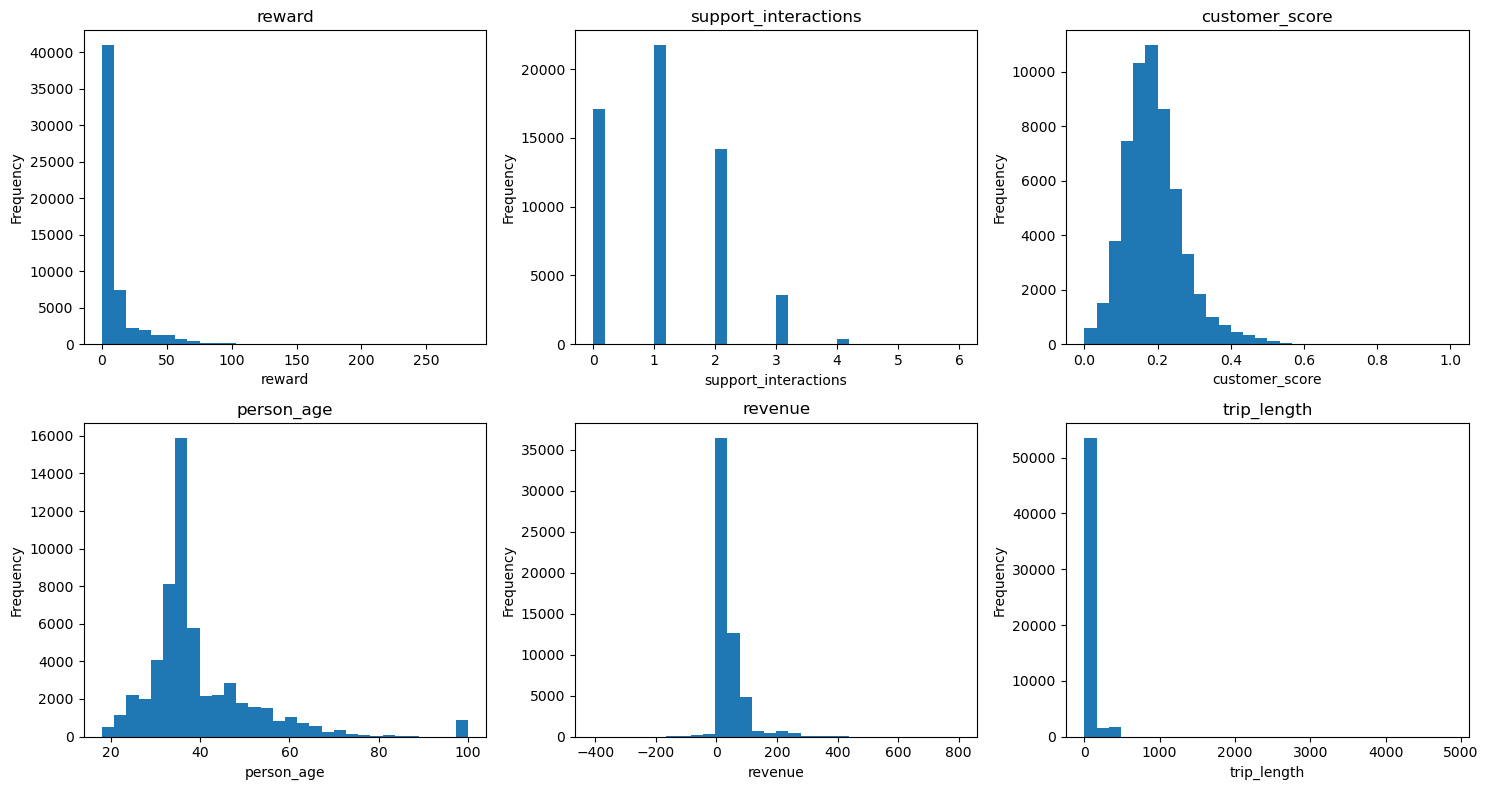

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    ax.hist(train[col], bins=30)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

The histograms proove the previous statistical interpretation. 

We can addidionaly check the skew and kurtosis for all distributions.

In [31]:
desc = train[numeric_cols].agg(['skew','kurtosis']).T
print(desc)

                           skew     kurtosis
reward                 4.031180    25.056463
support_interactions   0.505827    -0.318769
customer_score         0.948414     2.186679
person_age             2.170675     6.975630
revenue                3.250450    18.530059
trip_length           22.321353  1005.194562


Additionaly, we can create other graphics which will additional confirm the analyzes. Let's start from the boxplots.

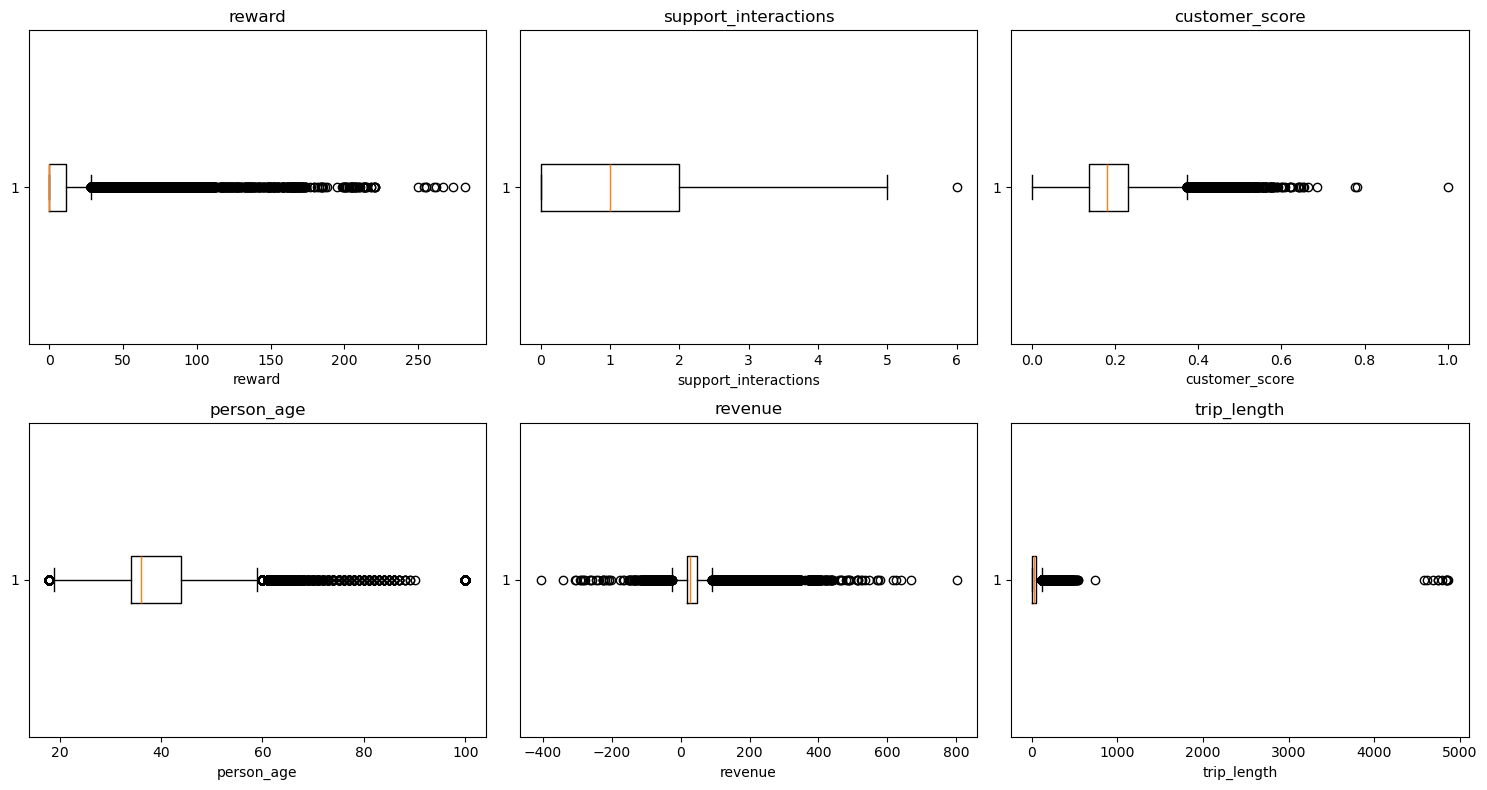

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    ax.boxplot(train[col], vert=False)
    ax.set_title(col)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

The other graphic representation will be violin plots.

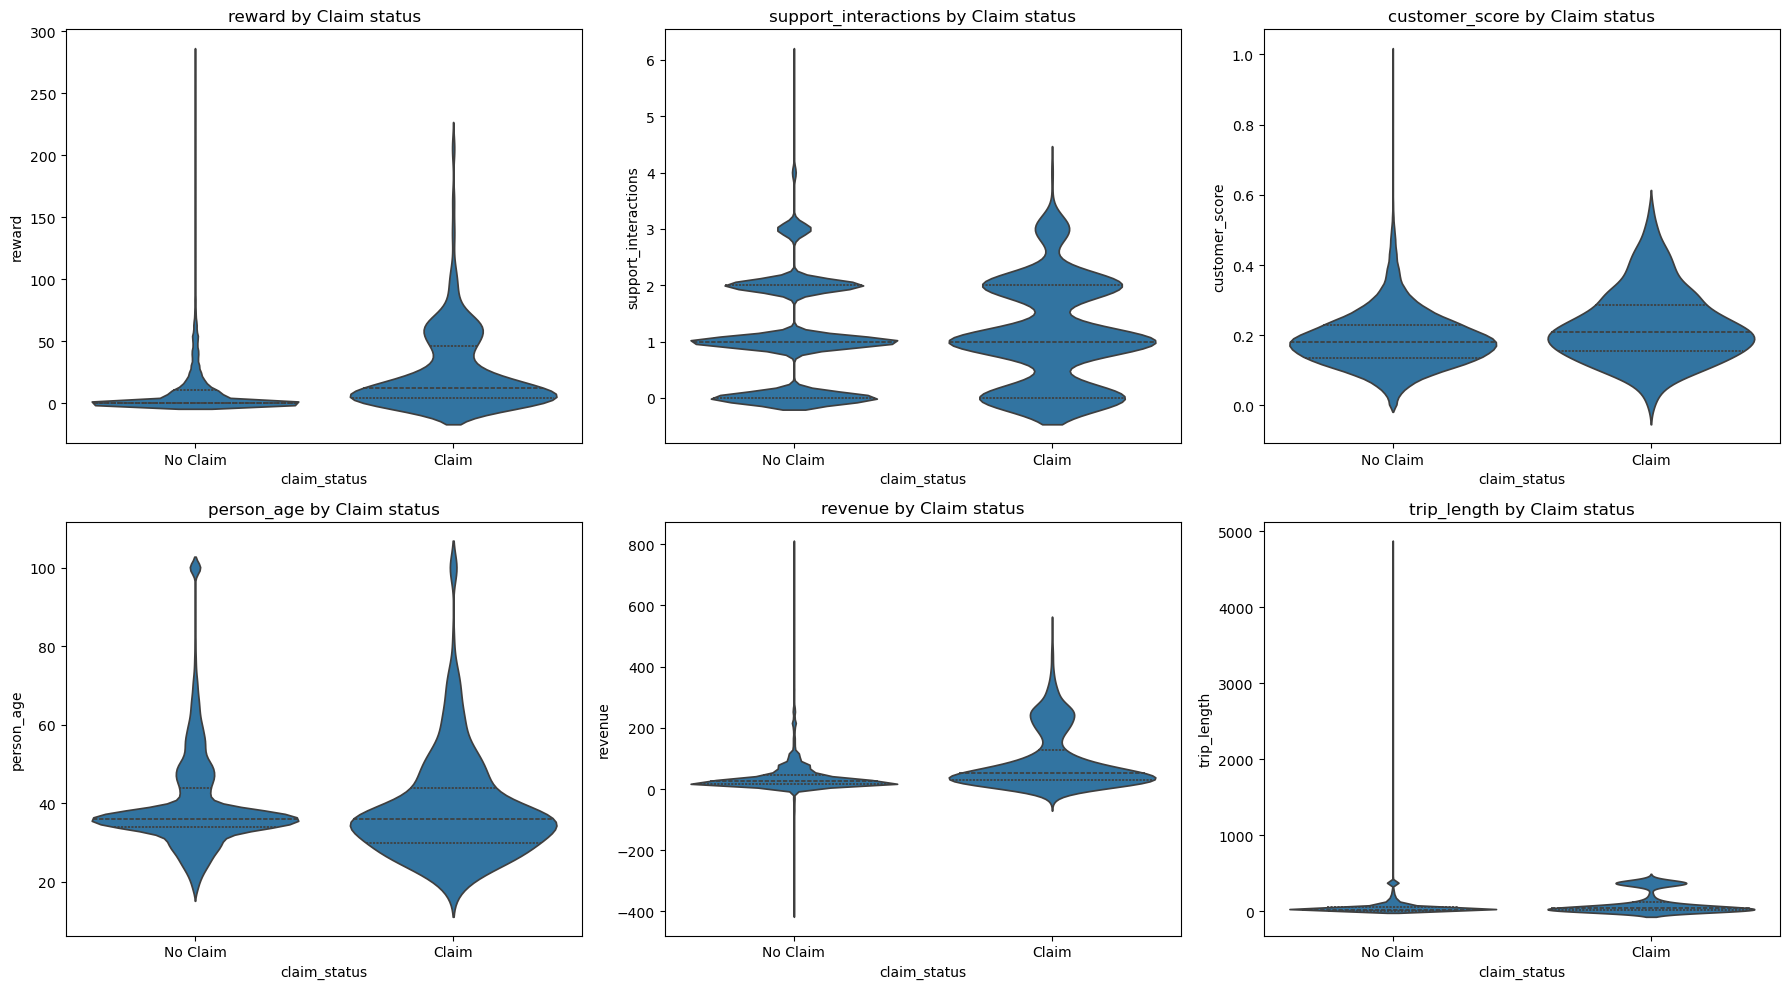

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sns.violinplot(
        x='claim_status',
        y=col,
        data=train,
        inner='quartile',
        density_norm='width',   
        ax=ax
    )
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No Claim','Claim'])
    ax.set_title(f'{col} by Claim status')

plt.tight_layout()
plt.show()

Finally, we can also plot KDI overlays, which show exactly where the two classes overlap or diverge on each feature. They also help to identify the specific value ranges where one class dominates.

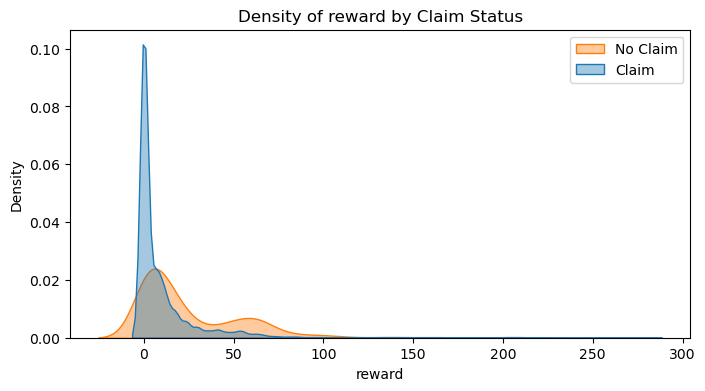

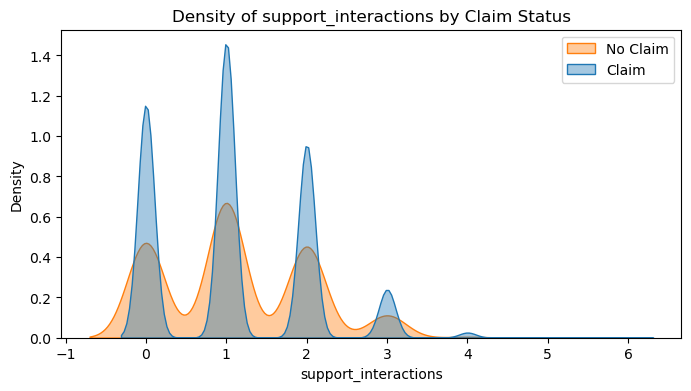

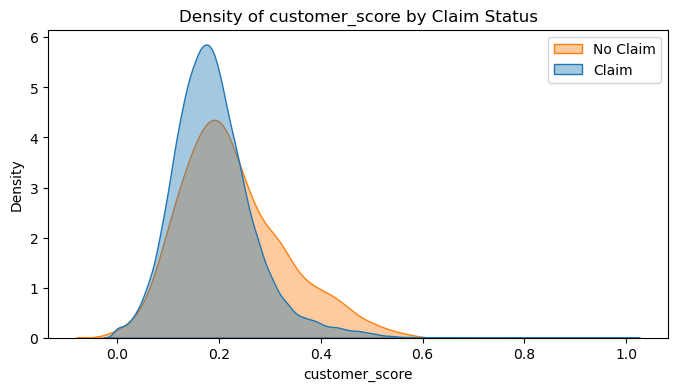

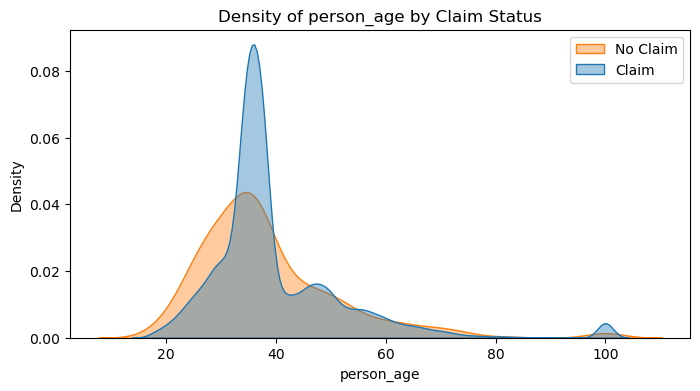

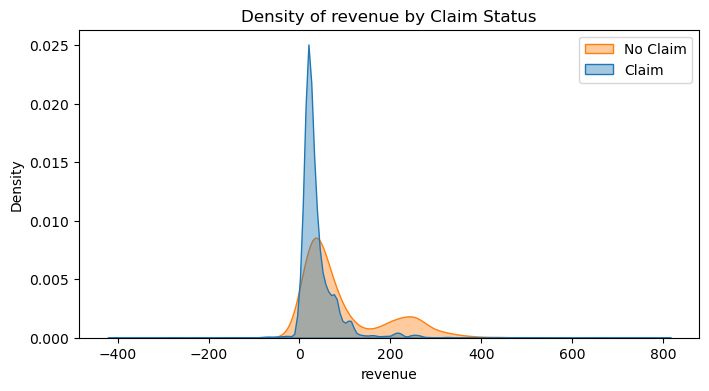

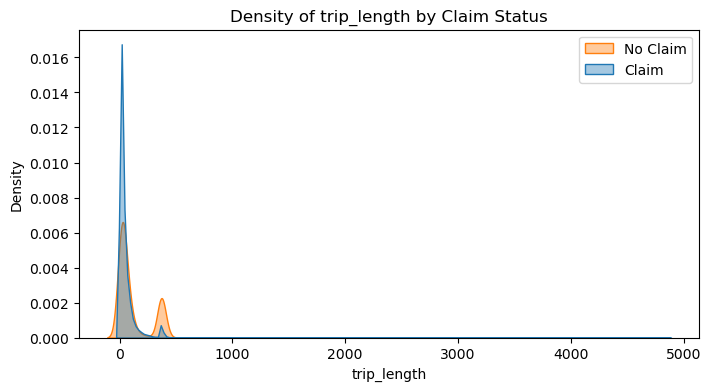

In [34]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(
        data=train,
        x=col,
        hue='claim_status',
        fill=True,
        common_norm=False,   
        alpha=0.4
    )
    plt.title(f'Density of {col} by Claim Status')
    plt.xlabel(col)
    plt.legend(['No Claim','Claim'])
    plt.show()

* **reward** - claimants typically receive lower rewards, while non-claimants may accumulate rewards differently or over longer periods,
* **customer_score** - people who don't make claims tend to have more variation in customer scores, possibly reflecting longer engagement or different behavior profiles,
* **person_age** - claim activity appears more common in a narrower age band, while non-claimants are more spread across age groups,
* **revenue** - claimants tend to have simpler or lower-revenue profiles, while non-claimants exhibit a more varied range of revenue values — possibly due to longer or more complex engagements,
* **trip_length** - claim activity is more common for shorter trips, while people who don’t submit claims tend to have a broader range of travel behavior,
* **support_interaction** - claimants seem to follow a more consistent support interaction pattern, often contacting support once or twice, whereas non-claimants show more variability.

Here, we are creating a list called categorical_cols that contains the names of all categorical features in the dataset (the object-type variables). These are variables that represent discrete groups or categories rather than continuous numerical values. 

In [35]:
categorical_cols = [
    'person_gender',
    'entity_type',
    'channel',
    'agent_id',
    'entity_a',
    'location',
    'product_id'
]

In the next code block, we will be creating a series of bar charts to visualize the distribution of the most frequent categories within each categorical variable in the dataset. For each column listed in categorical_cols, we plot the most common values along with their occurrence counts, which helps us understand the dominance, diversity or imbalance in each feature. 

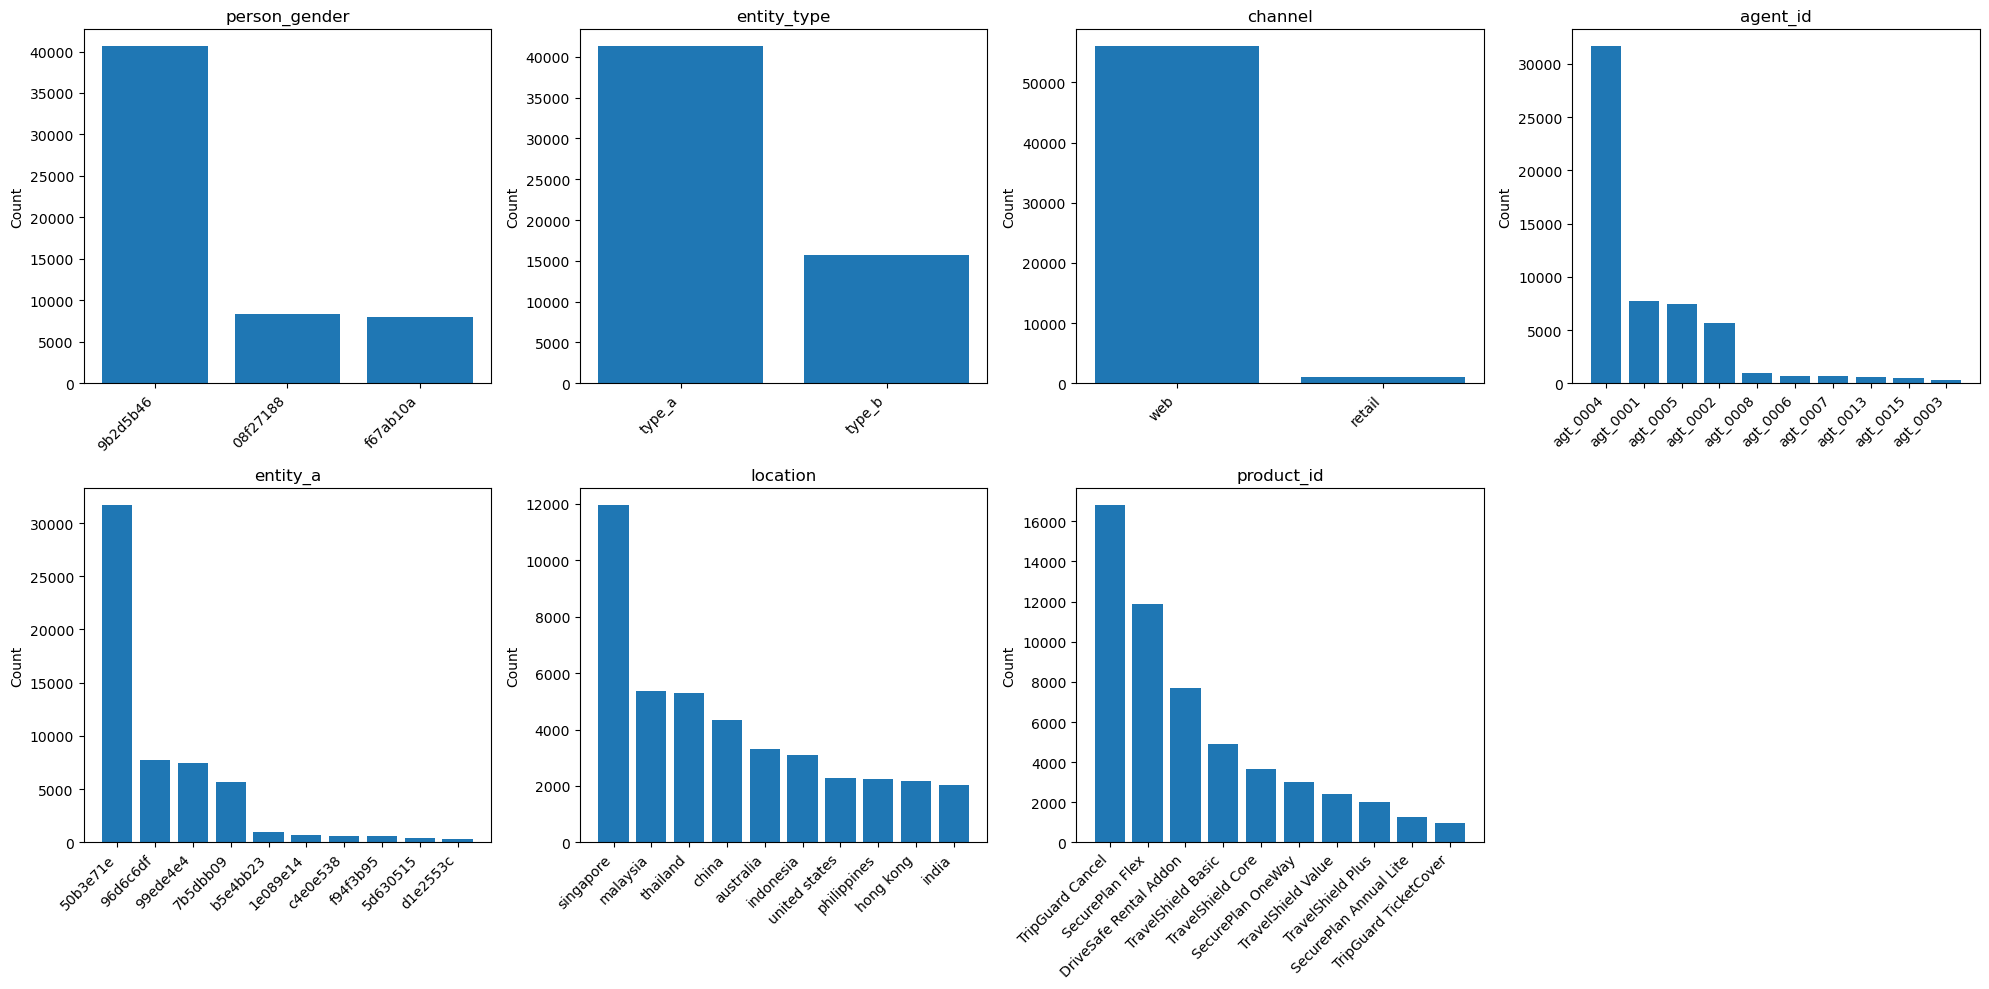

In [36]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    counts = train[col].value_counts().head(10)
    ax.bar(range(len(counts)), counts.values)
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
    ax.set_title(col)
    ax.set_ylabel('Count')

if len(categorical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

* **person_gender** - one encoded gender category (9b2d5b46) heavily dominates, accounting for the majority of entries,
* **entity_type** - type_a significantly outnumbers type_b, showing an unbalanced split between the two entity types,
* **channel** - the web channel overwhelmingly dominates with very few entries coming from retail,
* **agent_id** - A small number of agents handle the majority of cases,
* **entity_a** - One entity is overwhelmingly common, 
* **location** - Singapore leads by a large margin, followed by Malaysia, Thailand and China,
* **product_id** - TripGuard Cancel and SecurePlan Flex are the most common products.

We would like to have some more insight in the categorical data. For this purpose let's create picture of boxplots of reward by product ID.

Text(0.5, 1.0, 'Boxplot of Reward by Product ID')

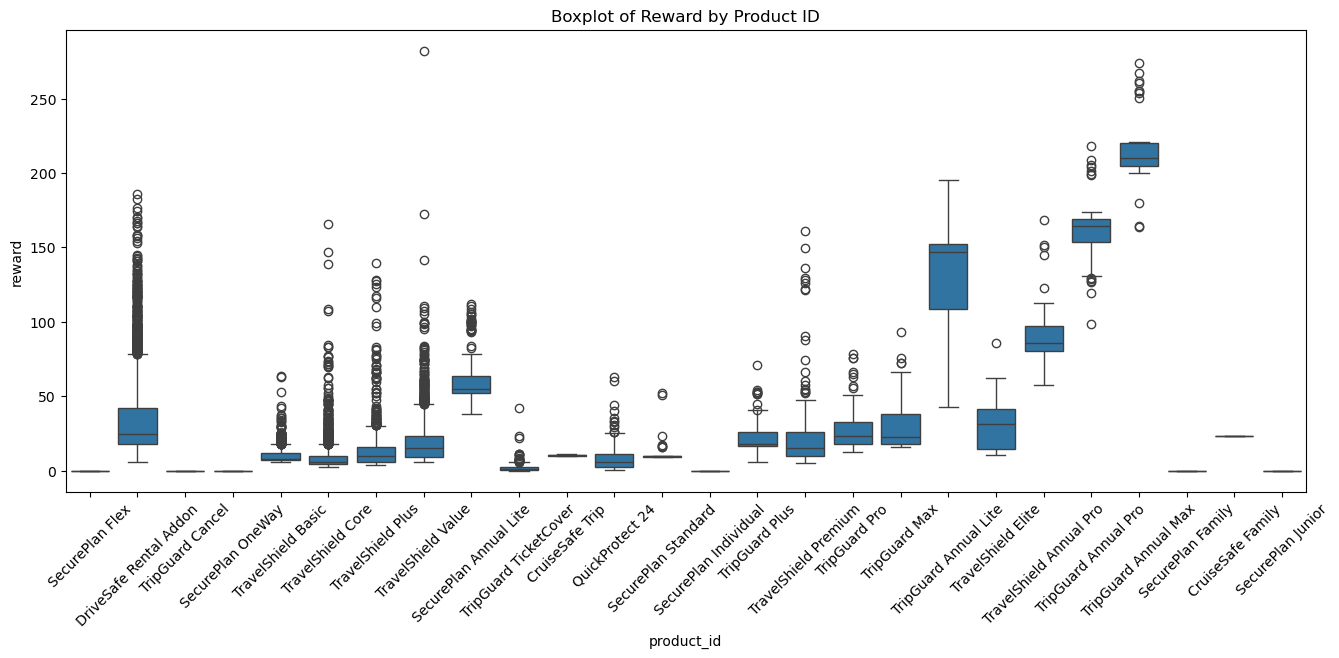

In [37]:
plt.figure(figsize=(16, 6)) 
sns.boxplot(data=train, x='product_id', y='reward')
plt.xticks(rotation=45)
plt.title('Boxplot of Reward by Product ID')

* Presence of outliers is prominent for many products, particularly in high-reward ones. This suggests that while most rewards are moderate, some customers receive very large payouts.
* Several products (e.g. SecurePlan Standard, SecurePlan Individual, CruiseSafe Family) have nearly flat boxes with rewards clustered around zero, suggesting they rarely result in significant payouts.

### *Feature Engineering*

*****Log-transformation*****

As we saw, three columns need transformation for the purpose of getting better results. These three variables are: revenue, reward and trip length. Generally speaking, a log‐transformation compresses a highly right‐skewed variable so that large outliers are pulled in and the distribution becomes more symmetric. After transforming, the models will be able to learn from the bulk of the data without being distorted by rare, enormous outliers.

The other option would be to conduct winsorization. After consideration, we decided to use log-transformation as capping may distort relationships.

In [38]:
train['revenue_log'] = np.log1p(train['revenue'] - train['revenue'].min() + 1)
train['reward_log'] = np.log1p(train['reward'])
train['trip_length_log'] = np.log1p(train['trip_length'])

After this transformation, we can see the changes on the graphs.

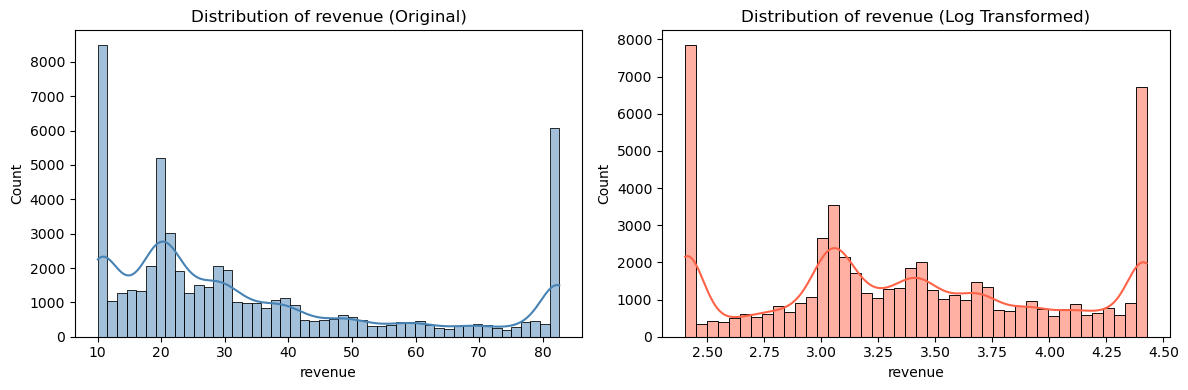

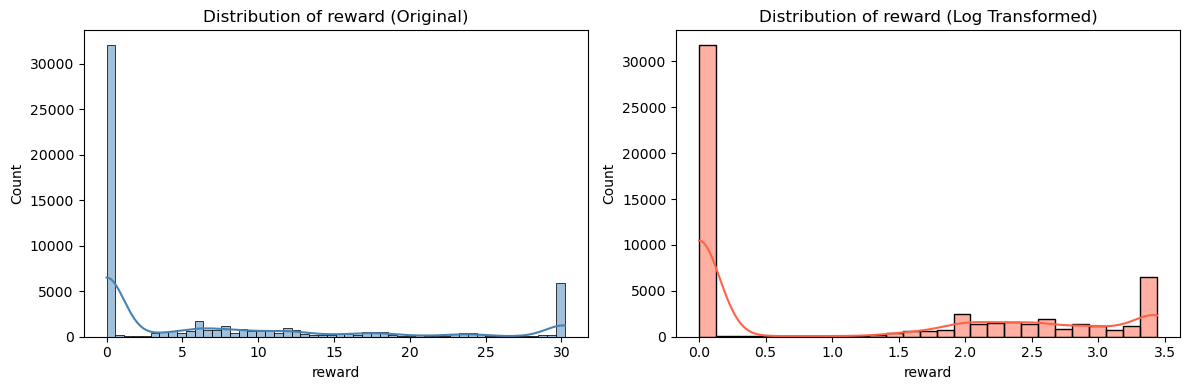

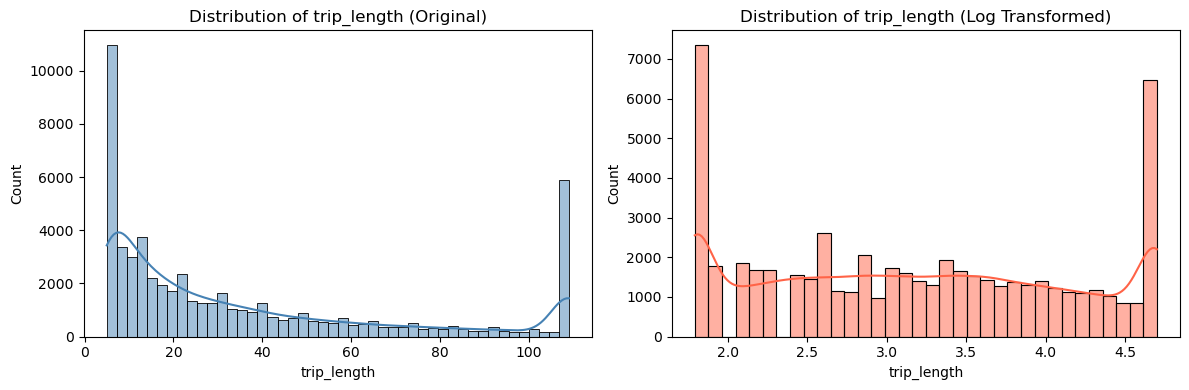

In [64]:
columns = ['revenue', 'reward', 'trip_length']

for col in columns:
    plt.figure(figsize=(12, 4))

    # Original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(train[col], kde=True, color='steelblue')
    plt.title(f'Distribution of {col} (Original)')
    positive_values = train[train[col] >= 0][col]
    transformed = np.log1p(positive_values)

    # Transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(transformed, kde=True, color='tomato')
    plt.title(f'Distribution of {col} (Log Transformed)')
    plt.tight_layout()



*****Correlation heatmap*****

In this step, we are generating a correlation matrix to examine the linear relationships between selected numerical variables, including the target variable claim_status. By visualizing the matrix as a heatmap, we can quickly identify which features are strongly or weakly correlated with each other. This helps guide feature selection, detect multicollinearity, and highlight variables that may be particularly informative for predicting claim behavior.

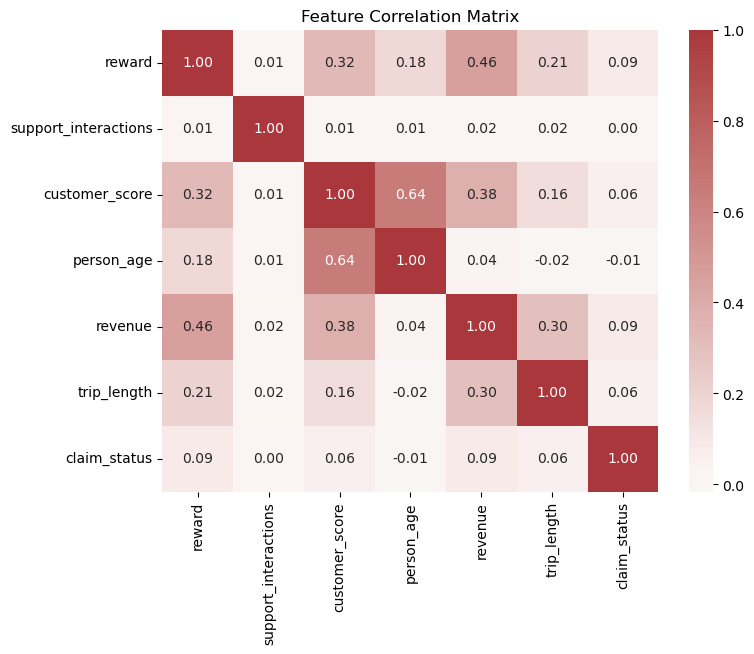

In [66]:
numeric_cols_with_target = numeric_cols + ['claim_status']
corr = train[numeric_cols_with_target].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Feature Correlation Matrix")
plt.show()


* Customer_score correlates strongly with both person_age and revenue, suggesting older, higher-scoring customers pay more in premiums.
* All features have very weak direct correlations with claim_status.
* Support_interactions shows almost no correlation with any other feature or the target.

## Modeling, cross-validation, hyperparameters

At this stage, we are preparing the dataset for modeling by separating the features from the target variable. The column claim_status, which indicates whether a claim was made, is assigned to the variable y and will serve as the target we aim to predict. Meanwhile, all other columns are stored in X as the input features, excluding claim_status, to ensure the model learns patterns without directly accessing the outcome during training.

In [41]:
target = 'claim_status'
X = train.drop(columns=[target])
y = train[target]

### *Logistic Regression*

Logistic regression is a basic supervised learning algorithm for predicting nominal binary variables (dichotomous variables) from a set of independent variables. It uses the sigmoid function (also known as the logistic function) to map the output of a linear model to a probability between 0 and 1. 

This line initializes a StratifiedKFold object, which is used for cross-validation in a way that maintains the original distribution of the target classes across each fold. Setting n_splits=5 means the data will be split into 5 folds, so the model will be trained and validated 5 times, each time using a different fold as the validation set and the remaining ones for training. The shuffle=True option ensures that the data is randomly shuffled before splitting, which helps prevent any unintended ordering effects. The random_state=42 makes the shuffling reproducible, so that the results will be consistent each time the code is run. 

In [71]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

The following part of the code defines the hyperparameter grid that will be used for tuning the logistic regression model during cross-validation. The C_list contains different values for the inverse of regularization strength (C), which controls how much the model tries to avoid overfitting — lower values mean stronger regularization. The penalty_list specifies the types of regularization to test: L2 (Ridge), L1 (Lasso), and ElasticNet, which is a combination of both. The sm_k_list defines different numbers of nearest neighbors to use in the SMOTE algorithm, which is applied to handle class imbalance by generating synthetic samples. Finally, the l1_ratio_list includes the mixing ratio for ElasticNet regularization, and is only used when penalty is set to 'elasticnet'.

In [70]:
C_list        = [0.01, 0.1, 1, 10]
penalty_list  = ['l2','l1','elasticnet']
sm_k_list     = [3,5,7,10]
l1_ratio_list = [0.5]  # only used when penalty='elasticnet'

What happens later? 
1. best_score is set to 0 and best_params is initialized as an empty dictionary to store the best hyperparameters found.
2. The code iterates over all combinations of C, penalty, and sm_k (for SMOTE). Depending on the penalty, it chooses compatible solvers and whether l1_ratio is needed.
3. For each hyperparameter combination, the code performs 5-fold stratified cross-validation using StratifiedKFold.
4. For each fold, it splits the dataset into training (X_tr, y_tr) and validation (X_va, y_va) sets.
5. Preprocessing:
    * Scaling: Numerical features are standardized using StandardScaler fit only on the training set.
    * Encoding: Categorical features are one-hot encoded using OneHotEncoder trained only on the training set.
    * Concatenation: The processed numeric and categorical features are horizontally stacked to form the final training and validation sets.
6. The training data is balanced using the SMOTE algorithm, generating synthetic samples for the minority class.
7. A logistic regression model is trained on the balanced training data using the current set of hyperparameters.
8. The trained model is evaluated on the validation set using balanced_accuracy_score and the result is stored in cv_scores.
9. After all folds, the mean cross-validation score is computed.
10. If the current mean score is better than best_score, the values of best_score and best_params are updated accordingly.
11. Once all combinations are evaluated, the best balanced accuracy score and the corresponding hyperparameters are printed.

In [ ]:
best_score_logistic_regression  = 0
best_params = {}

for C in C_list:
    for penalty in penalty_list:
        for sm_k in sm_k_list:
            # determine valid solvers & l1_ratio
            if penalty == 'l2':
                solvers    = ['lbfgs','liblinear','saga']
                l1_ratios  = [None]
            elif penalty == 'l1':
                solvers    = ['liblinear','saga']
                l1_ratios  = [None]
            else:  # elasticnet
                solvers    = ['saga']
                l1_ratios  = l1_ratio_list

            for solver in solvers:
                for l1_ratio in l1_ratios:
                    cv_scores = []

                    # 5‐fold CV
                    for train_idx, valid_idx in skf.split(X, y):
                        X_tr, X_va = X.iloc[train_idx], X.iloc[valid_idx]
                        y_tr, y_va = y.iloc[train_idx], y.iloc[valid_idx]

                        # scale numerics
                        scaler = StandardScaler().fit(X_tr[numeric_cols])
                        X_tr_num  = scaler.transform(X_tr[numeric_cols])
                        X_va_num  = scaler.transform(X_va[numeric_cols])

                        # one‐hot encoding categoricals
                        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) \
                                        .fit(X_tr[categorical_cols])
                        X_tr_cat = ohe.transform(X_tr[categorical_cols])
                        X_va_cat = ohe.transform(X_va[categorical_cols])

                        # assemble
                        X_tr_proc = np.hstack([X_tr_num, X_tr_cat])
                        X_va_proc = np.hstack([X_va_num, X_va_cat])

                        # SMOTE
                        sm = SMOTE(k_neighbors=sm_k, random_state=42)
                        X_tr_bal, y_tr_bal = sm.fit_resample(X_tr_proc, y_tr)

                        # fit LogisticRegression
                        clf = LogisticRegression(
                            C=C,
                            penalty=penalty,
                            solver=solver,
                            l1_ratio=l1_ratio,
                            class_weight='balanced',
                            max_iter=1000,
                            random_state=42
                        )
                        clf.fit(X_tr_bal, y_tr_bal)

                        # evaluate
                        y_pred = clf.predict(X_va_proc)
                        cv_scores.append(balanced_accuracy_score(y_va, y_pred))

                    mean_score = np.mean(cv_scores)

                    if mean_score > best_score:
                        best_score = mean_score
                        best_params = {
                            'C': C,
                            'penalty': penalty,
                            'solver': solver,
                            'l1_ratio': l1_ratio,
                            'sm_k_neighbors': sm_k
                        }

print("Best CV balanced accuracy:", best_score_logistic_regression)
print("Best hyperparameters:", best_params)

c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

Best CV balanced accuracy: 0.7559003357858648
Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear', 'l1_ratio': None, 'sm_k_neighbors': 3}


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


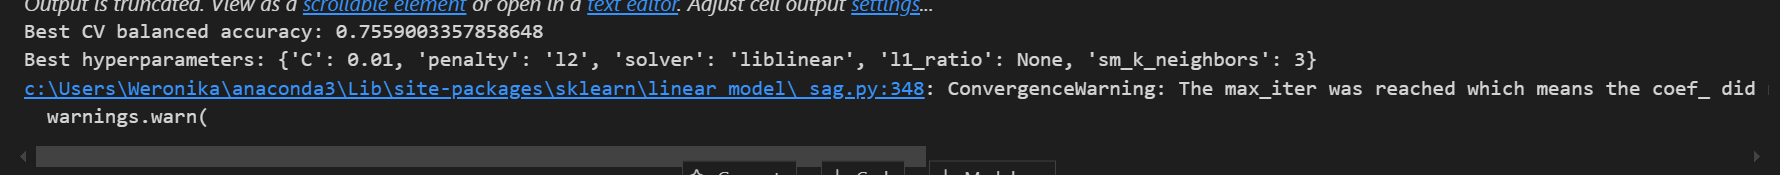

### *K-Nearest Neighbours*

Let's move to the next algorithm - KNN. 

The K-nearest neighbours (KNN) algorithm is a basic and probably the simplest supervised machine learning algorithm for both classification and regression problems. Behind this algorithm is the following idea of locality: the best prediction for a certain observation is the known target value (label) for the observation from the training set that is most similar to the observation for which we are predicting.

In the first line we are creating a list of odd integers starting from 1 up to (but not including) 150, incrementing by 2 each time.

In [72]:
k_list = list(range(1, 150, 2))

Later on, we initialize a StratifiedKFold object.

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
best_score_knn = 0
best_k = None

for k in k_list:
    fold_scores = []
    for train_idx, valid_idx in cv.split(X, y):
        # split
        X_tr, X_va = X.iloc[train_idx], X.iloc[valid_idx]
        y_tr, y_va = y.iloc[train_idx], y.iloc[valid_idx]

        # scale nums
        scaler = StandardScaler().fit(X_tr[numeric_cols])
        X_tr_num = scaler.transform(X_tr[numeric_cols])
        X_va_num = scaler.transform(X_va[numeric_cols])

        # one-hot cats
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(X_tr[categorical_cols])
        X_tr_cat = ohe.transform(X_tr[categorical_cols])
        X_va_cat = ohe.transform(X_va[categorical_cols])

        # assemble
        X_tr_proc = np.hstack([X_tr_num, X_tr_cat])
        X_va_proc = np.hstack([X_va_num, X_va_cat])

        # resample
        sm = SMOTE(random_state=42)
        X_tr_bal, y_tr_bal = sm.fit_resample(X_tr_proc, y_tr)

        # fit & eval
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        knn.fit(X_tr_bal, y_tr_bal)
        y_pred = knn.predict(X_va_proc)
        fold_scores.append(balanced_accuracy_score(y_va, y_pred))

    mean_score = np.mean(fold_scores)
    print(f"k={k:2d} → BA={mean_score:.4f}")
    if mean_score > best_score_knn:
        best_score_knn, best_k = mean_score, k

print(f"\n→ Best k = {best_k}, CV balanced accuracy = {best_score:.4f}")

k= 1 → BA=0.5585
k= 3 → BA=0.5845
k= 5 → BA=0.5969
k= 7 → BA=0.6159
k= 9 → BA=0.6291
k=11 → BA=0.6340
k=13 → BA=0.6407
k=15 → BA=0.6475
k=17 → BA=0.6552
k=19 → BA=0.6636
k=21 → BA=0.6626
k=23 → BA=0.6701
k=25 → BA=0.6746
k=27 → BA=0.6768
k=29 → BA=0.6837
k=31 → BA=0.6878
k=33 → BA=0.6908
k=35 → BA=0.6905
k=37 → BA=0.6948
k=39 → BA=0.6966
k=41 → BA=0.6985
k=43 → BA=0.7015
k=45 → BA=0.7040
k=47 → BA=0.7038
k=49 → BA=0.7071
k=51 → BA=0.7069
k=53 → BA=0.7099
k=55 → BA=0.7107
k=57 → BA=0.7108
k=59 → BA=0.7124
k=61 → BA=0.7138
k=63 → BA=0.7136
k=65 → BA=0.7146
k=67 → BA=0.7157
k=69 → BA=0.7141
k=71 → BA=0.7159
k=73 → BA=0.7175
k=75 → BA=0.7147
k=77 → BA=0.7150
k=79 → BA=0.7166
k=81 → BA=0.7164
k=83 → BA=0.7161
k=85 → BA=0.7173
k=87 → BA=0.7191
k=89 → BA=0.7193
k=91 → BA=0.7182
k=93 → BA=0.7176
k=95 → BA=0.7182
k=97 → BA=0.7177
k=99 → BA=0.7179
k=101 → BA=0.7175
k=103 → BA=0.7184
k=105 → BA=0.7182
k=107 → BA=0.7191
k=109 → BA=0.7191
k=111 → BA=0.7196
k=113 → BA=0.7189
k=115 → BA=0.7199
k=117 

For KNN the highest balanced_accuracy is 0.7204 for k = 95.

### *SVM*

In [ ]:
# SVM model
svm = SVC()

# Create a pipeline with SMOTE
pipeline = Pipeline(steps=[
    ('preprocessor', processor),  # Preprocess numeric and categorical features
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE to balance the dataset
    ('svm', svm)  # Train the SVM model
])

# Define the parameter grid for random search
param_distributions = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'svm__gamma': ['scale', 'auto'],  # Kernel coefficient
    'svm__degree': [2, 3, 4]  # Degree for 'poly' kernel
}

# RandomizedSearchCV
random_search_svm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=5,  # Number of random combinations to try
    scoring='balanced_accuracy',  # Metric to optimize
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=2  # Use all available cores
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the model
random_search_svm.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search_svm.best_params_)
print("Best Cross-Validation Balanced Accuracy:", random_search_svm.best_score_)

# Evaluate on the test set
y_pred = random_search_svm.best_estimator_.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
# 4) Stack your preprocessed features
X_tr_pre = np.hstack([X_tr_num, X_tr_cat])
X_va_pre = np.hstack([X_va_num, X_va_cat])

# 5) Rebalance the training set with SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_res, y_res = smoteenn.fit_resample(X_tr_pre, y_tr)

# 6) Train the SVM (with class_weight to favor the minority)
svm = SVC(
    C=1.0, 
    kernel='rbf', 
    gamma='scale', 
    class_weight='balanced', 
    probability=True,
    random_state=42
)
svm.fit(X_res, y_res)

# 7) Evaluate on your held-out validation fold
y_pred = svm.predict(X_va_pre)
print("Balanced Accuracy:", balanced_accuracy_score(y_va, y_pred))

c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Balanced Accuracy: 0.7377423054345409


The highest balanced accuracy is for logistic regression model.

#### Evaluation metrics

## Predictions

In [33]:
target = 'claim_status'
X = train.drop(columns=[target])
y = train[target]

# 1) Unpack best hyper-parameters (as you printed them)
best_params = {
    'C':             0.01,
    'penalty':       'l2',
    'solver':        'liblinear',
    'l1_ratio':      None,
    'sm_k_neighbors':3
}


numeric_cols     = ['reward_log','support_interactions','customer_score','person_age','revenue_log','trip_length_log']
categorical_cols = ['person_gender','entity_type','channel','entity_a','location','agent_id','product_id']

# 2) Fit final scalers/encoders on the full training set
scaler_final = StandardScaler().fit(X[numeric_cols])
ohe_final    = OneHotEncoder(handle_unknown='ignore', sparse_output=False) \
                   .fit(X[categorical_cols])

# 3) Preprocess ALL train data and SMOTE-resample
X_num_all    = scaler_final.transform(X[numeric_cols])
X_cat_all    = ohe_final.transform(X[categorical_cols])
X_proc_all   = np.hstack([X_num_all, X_cat_all])

X_bal, y_bal = SMOTE(k_neighbors=3, random_state=42) \
                  .fit_resample(X_proc_all, y)

# 4) Train your final LogisticRegression
clf_final = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='liblinear',
    l1_ratio=None,
    class_weight='balanced',
    max_iter=5000,
    random_state=42
)
clf_final.fit(X_bal, y_bal)

# 5) Preprocess the test set
# Create log-transformed columns in test set (same as in train)
test = test.copy()
test['revenue_log'] = np.log1p(test['revenue'] - train['revenue'].min() + 1)
test['reward_log'] = np.log1p(test['reward'])
test['trip_length_log'] = np.log1p(test['trip_length'])

X_test_num  = scaler_final.transform(test[numeric_cols])
X_test_cat  = ohe_final.transform(test[categorical_cols])
X_test_proc = np.hstack([X_test_num, X_test_cat])

# 6) Predict
y_test_pred = clf_final.predict(X_test_proc)

# 7) Save to CSV
output = pd.DataFrame({
    'id':         test.index,       # or use test['your_id_col] if you have one
    'prediction': y_test_pred
})
output.to_csv('predictions.csv', index=False)
print("Written predictions.csv with", len(output), "rows")


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Written predictions.csv with 6333 rows
